In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('s2_data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


##1. Скачайте датасет. Проанализируйте его на наличие пропусков используя
pandas.
Напишите в чат какие пропущенные значения вы обнаружили и причины их
появления.

In [3]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

##2. Найдите в датафрейме дубликаты. И удалите их. Значения могут быть
одинаковыми но написаны по разному. Например может отличаться размер
регистра(заглавные и строчные буквы)
Напишите в чат возможные причины появления дубликатов.

In [5]:
df.duplicated().sum()

54

In [6]:
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
df['education'] = df['education'].str.lower()

##3. Сделайте колонку purpose_category в которую войдут следующие категории:
• операции с автомобилем,
• операции с недвижимостью,
• проведение свадьбы,
• получение образования

In [8]:
df['purpose'].unique()
def categorise_purpose(purpose):
    if 'автомоб' in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose or 'жиль' in purpose:
        return 'операции с недвижимостью'
    if 'свадь' in purpose:
        return 'проведение свадьбы'
    if 'образ' in purpose:
        return 'получение образования'
    
df['purpose_category'] = df['purpose'].apply(categorise_purpose)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,операции с недвижимостью
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,операции с автомобилем
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,операции с недвижимостью
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,операции с недвижимостью
21467,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,операции с автомобилем
21468,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,операции с недвижимостью
21469,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,операции с автомобилем


In [10]:
df_hw = pd.read_csv('fifa_s2.csv')
df_hw.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0


In [13]:
print(df_hw.shape)
print(df_hw.dtypes)

(2399, 18)
ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                          int64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object


In [14]:
df_numeric = df_hw.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df_hw.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['ID' 'Age' 'Overall' 'Potential' 'Value' 'Wage'
 'International Reputation' 'Skill Moves' 'Joined' 'Height' 'Weight'
 'Release Clause']
['Name' 'Nationality' 'Club' 'Preferred Foot' 'Position'
 'Contract Valid Until']


<Axes: >

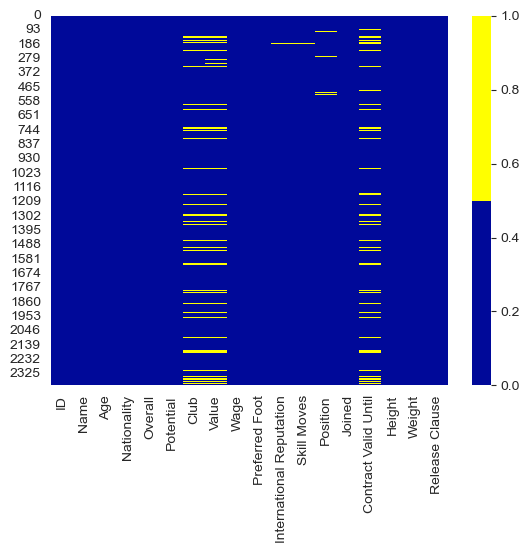

In [15]:
colours = ['#000999', '#ffff00']
sns.heatmap(df_hw.isnull(),cmap=colours,vmin=0,vmax=1)

In [16]:
for col in df_hw.columns:
    missing_values = np.mean(df_hw[col].isnull())
    print(f'{col} - {round(missing_values * 100)}%')

ID - 0%
Name - 0%
Age - 0%
Nationality - 0%
Overall - 0%
Potential - 0%
Club - 10%
Value - 11%
Wage - 0%
Preferred Foot - 0%
International Reputation - 0%
Skill Moves - 0%
Position - 1%
Joined - 0%
Contract Valid Until - 11%
Height - 0%
Weight - 0%
Release Clause - 0%


In [17]:
df_hw.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,2399.000000,2399.000000,2399.000000,2399.000000,2142.000000,2399.000000,2389.000000,2393.000000,2399.000000,2399.000000,2399.000000,2396.000000
mean,212033.680700,25.213005,69.115048,74.115048,5980.873016,24.178825,1.308497,2.469703,2016.145894,5.955300,166.802782,10690.033498
std,30549.399068,4.633622,8.060195,7.190957,11963.420681,49.552098,0.687175,0.844531,2.085829,0.219249,15.241015,21780.029323
min,1179.000000,16.000000,47.000000,48.000000,20.000000,0.000000,1.000000,1.000000,2000.000000,5.250000,121.000000,35.000000
25%,195105.000000,22.000000,64.000000,69.000000,500.000000,1.000000,1.000000,2.000000,2016.000000,5.833333,154.000000,1100.000000
50%,218745.000000,25.000000,69.000000,74.000000,1100.000000,5.000000,1.000000,2.000000,2017.000000,6.000000,165.000000,3800.000000
75%,234576.000000,29.000000,74.000000,79.000000,6000.000000,22.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,7500.000000
max,246608.000000,44.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.583333,214.000000,228100.000000


<Axes: >

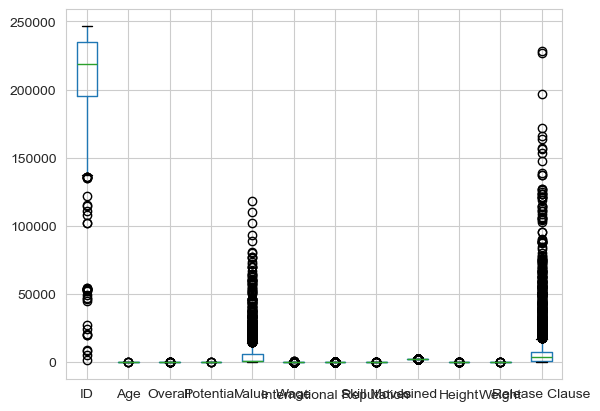

In [18]:
df_hw.boxplot()

In [25]:
mead = df_hw['Age'].median()
df_hw['Age'] = df_hw['Age'].fillna(mead)
df_hw

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
1,5479,Casillas,37,Spain,82,82,FC Porto,1500.0,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,1.0,3.0,CM,2018,01/01/2019,5.916667,165.0,1400.0
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,1.0,2.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,1.0,3.0,RW,2018,01/01/2020,5.833333,154.0,2600.0
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,1.0,2.0,LB,2018,01/01/2019,5.583333,139.0,2200.0


In [34]:
df_hw_without_pisition = df_hw[df_hw['Position'].isna() == 0]
df_hw_without_pisition

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77,Right,4.0,1.0,GK,2018,01/01/2019,6.333333,203.0,7400.0
2,8205,Braga,35,Portugal,70,70,CD Aves,750.0,5,Right,1.0,3.0,LCM,2017,01/01/2019,5.916667,165.0,1600.0
3,9014,A. Robben,34,Netherlands,84,84,FC Bayern München,15500.0,110,Left,4.0,4.0,RM,2009,01/01/2019,5.916667,176.0,25600.0
4,19521,J. Ibehre,35,England,61,61,Cambridge United,120.0,2,Right,1.0,2.0,ST,2017,01/01/2019,6.333333,203.0,210.0
5,20209,Ricardo Costa,37,Portugal,74,74,CD Tondela,750.0,4,Right,2.0,2.0,LCB,2017,01/01/2019,6.000000,181.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,246465,Guerrero,16,Spain,63,76,CF Rayo Majadahonda,625.0,1,Left,1.0,3.0,CM,2018,01/01/2019,5.916667,165.0,1400.0
2395,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2,Right,1.0,2.0,CDM,2018,01/01/2021,5.833333,146.0,1100.0
2396,246599,Guillem Jaime,19,Spain,64,80,FC Barcelona,975.0,13,Right,1.0,3.0,RW,2018,01/01/2020,5.833333,154.0,2600.0
2397,246606,Fran García,18,Spain,64,79,Real Madrid,825.0,9,Left,1.0,2.0,LB,2018,01/01/2019,5.583333,139.0,2200.0


In [31]:
df_hw['Contract Valid Until'].unique()

array(['01/01/2019', '01/01/2022', nan, '01/01/2020', '01/01/2021',
       '01/01/2023', '01/01/2018', '30/06/2019', '31/05/2019',
       '31/12/2018', '01/01/2024', '30/06/2020', '02/01/2019',
       '01/01/2025', '12/01/2019', '05/01/2019', '20/01/2019'],
      dtype=object)

In [35]:
df_hw_without_pisition.duplicated().sum()

0

In [36]:
df_hw_without_pisition['Club'].unique()

array(['Paris Saint-Germain', 'CD Aves', 'FC Bayern München',
       'Cambridge United', 'CD Tondela', 'Juventus', 'Milan', 'Celtic',
       'BSC Young Boys', 'Malmö FF', 'Lazio', '1. FC Köln', 'Bury',
       'Roma', 'Carlisle United', 'Manchester United', 'Burton Albion',
       'Inter', 'Chelsea', 'Cagliari', 'Arsenal', 'Cádiz CF', 'AS Monaco',
       '1. FSV Mainz 05', 'Burnley', 'Manchester City', 'CD Nacional',
       'Bristol City', "CD O'Higgins", 'CD Palestino', 'Brescia',
       '1. FC Kaiserslautern', 'Brisbane Roar', 'Liverpool',
       'CD Feirense', 'Aston Villa', nan, 'Cardiff City',
       'CF Rayo Majadahonda', 'CD Tenerife',
       'CD Universidad de Concepción', 'Atalanta',
       'Borussia Mönchengladbach', 'Brighton & Hove Albion', 'CD Lugo',
       'CD Numancia', 'Sevilla FC', 'CD Leganés', 'CA Osasuna',
       'Lokomotiv Moscow', 'Bayer 04 Leverkusen', 'FC Barcelona',
       'Real Madrid', 'Central Coast Mariners', 'Cerezo Osaka',
       'FC Porto', 'Charlton Athl

In [54]:
df_hw_without_pisition['Club'] = df_hw_without_pisition['Club'].str.lower()
df_hw_without_pisition.shape

C:\Users\lexip\AppData\Local\Temp\ipykernel_15524\1301839365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw_without_pisition['Club'] = df_hw_without_pisition['Club'].str.lower()


(2378, 19)

In [55]:
df_hw_without_pisition['Club'].unique()


array(['paris saint-germain', 'cd aves', 'fc bayern münchen',
       'cambridge united', 'cd tondela', 'juventus', 'milan', 'celtic',
       'bsc young boys', 'malmö ff', 'lazio', '1. fc köln', 'bury',
       'roma', 'carlisle united', 'manchester united', 'burton albion',
       'inter', 'chelsea', 'cagliari', 'arsenal', 'cádiz cf', 'as monaco',
       '1. fsv mainz 05', 'burnley', 'manchester city', 'cd nacional',
       'bristol city', "cd o'higgins", 'cd palestino', 'brescia',
       '1. fc kaiserslautern', 'brisbane roar', 'liverpool',
       'cd feirense', 'aston villa', nan, 'cardiff city',
       'cf rayo majadahonda', 'cd tenerife',
       'cd universidad de concepción', 'atalanta',
       'borussia mönchengladbach', 'brighton & hove albion', 'cd lugo',
       'cd numancia', 'sevilla fc', 'cd leganés', 'ca osasuna',
       'lokomotiv moscow', 'bayer 04 leverkusen', 'fc barcelona',
       'real madrid', 'central coast mariners', 'cerezo osaka',
       'fc porto', 'charlton athl

C:\Users\lexip\AppData\Local\Temp\ipykernel_15524\3598357090.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw_without_pisition['age_category'] = df_hw_without_pisition['Age'].apply(categorise_age)


<Axes: xlabel='age_category'>

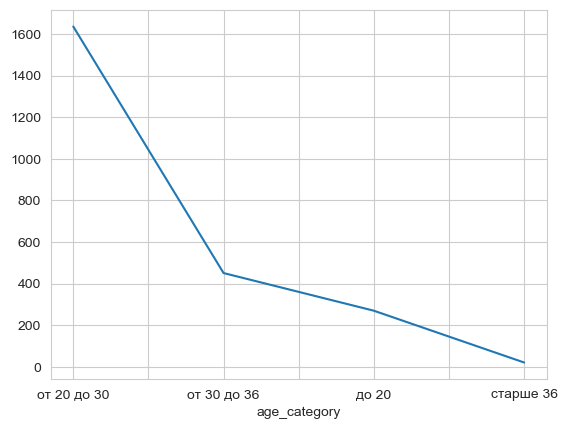

In [56]:
def categorise_age(age):
    if age < 20:
        return 'до 20'
    elif age < 30:
        return 'от 20 до 30'
    elif age < 36:
        return 'от 30 до 36'
    else:
        return 'старше 36'
    
df_hw_without_pisition['age_category'] = df_hw_without_pisition['Age'].apply(categorise_age)
df_hw_without_pisition['age_category'].value_counts().plot()